# 1. Import Libraries

In [41]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Libraries needed to read a specific file from a ZIP
import requests
import zipfile
import io

# 2. Load the Data

In [42]:
print("Loading and preparing the HTRU2 pulsar dataset...")
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip'
r = requests.get(url)
try:
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        with z.open('HTRU_2.csv') as f:
            pulsar_data = pd.read_csv(f, header=None)
except Exception as e:
    print(f"Failed to load data: {e}")
    pulsar_data = pd.DataFrame()

if not pulsar_data.empty:
    feature_names = [
        'mean_integrated_profile', 'std_integrated_profile',
        'kurtosis_integrated_profile', 'skewness_integrated_profile',
        'mean_dmsnr_curve', 'std_dmsnr_curve',
        'kurtosis_dmsnr_curve', 'skewness_dmsnr_curve'
    ]
    pulsar_data.columns = feature_names + ['target_class']
    X = pulsar_data.drop('target_class', axis=1)
    y = pulsar_data['target_class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print("Data preparation complete.")


Loading and preparing the HTRU2 pulsar dataset...
Data preparation complete.


# 3. Train a Classifier
(for this case, we will be using the SHAP as our modernizer.

In [43]:
print("\nTraining a RandomForestClassifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete.")


Training a RandomForestClassifier...
Model training complete.


# 4. Perform the SHAP analysis

In [44]:
print("\nStarting SHAP analysis with the modern API...")

# Create a SHAP explainer object using the recommended shap.Explainer
# This automatically selects the best explainer (TreeExplainer in this case)
explainer = shap.Explainer(model, X_train)

# Calculate the SHAP values for the test data
    # This returns a special Explanation object that is easier to work with
shap_explanation = explainer(X_test)
print("SHAP Explanation object created.")


Starting SHAP analysis with the modern API...


 99%|===================| 7102/7160 [01:23<00:00]        

SHAP Explanation object created.


# 4.1. Visualize the Results 
The new API makes plotting much simpler!

### 1. Global Feature Importance (Beeswarm Plot)


Generating SHAP Beeswarm Plot...


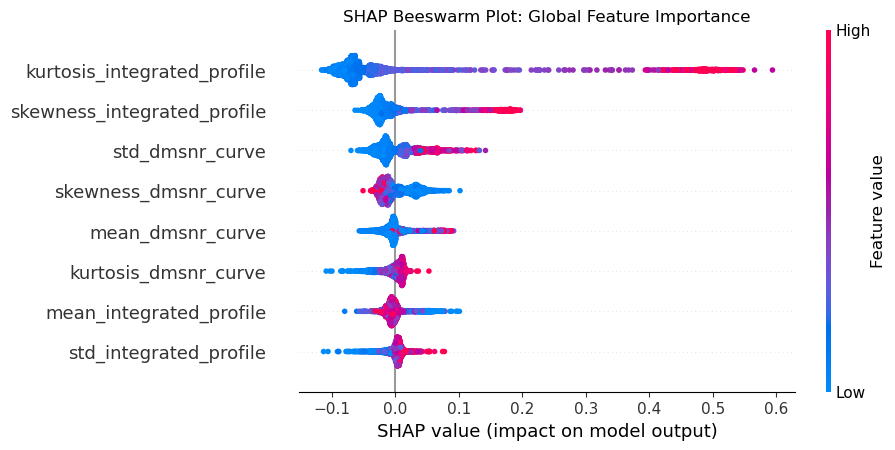

In [47]:
print("\nGenerating SHAP Beeswarm Plot...")
shap.plots.beeswarm(shap_explanation[:,:,1], show=False)
plt.title("SHAP Beeswarm Plot: Global Feature Importance")
plt.show()

### 2. Global Feature Importance (Bar Plot)



Generating SHAP Bar Plot...


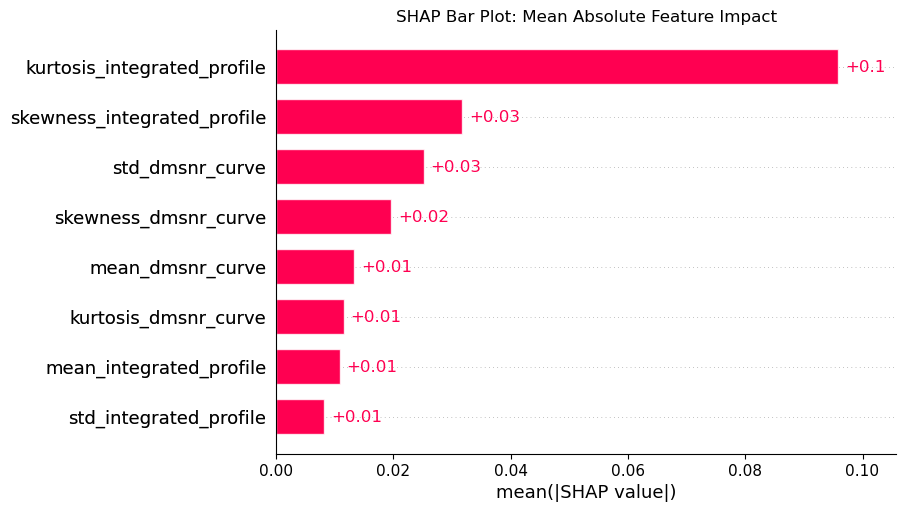

In [48]:
print("\nGenerating SHAP Bar Plot...")
shap.plots.bar(shap_explanation[:,:,1], show=False)
plt.title("SHAP Bar Plot: Mean Absolute Feature Impact")
plt.show()

### 3. Individual Prediction Explanation (Waterfall Plot)


Generating Waterfall Plot for a True Pulsar prediction (instance 8)...


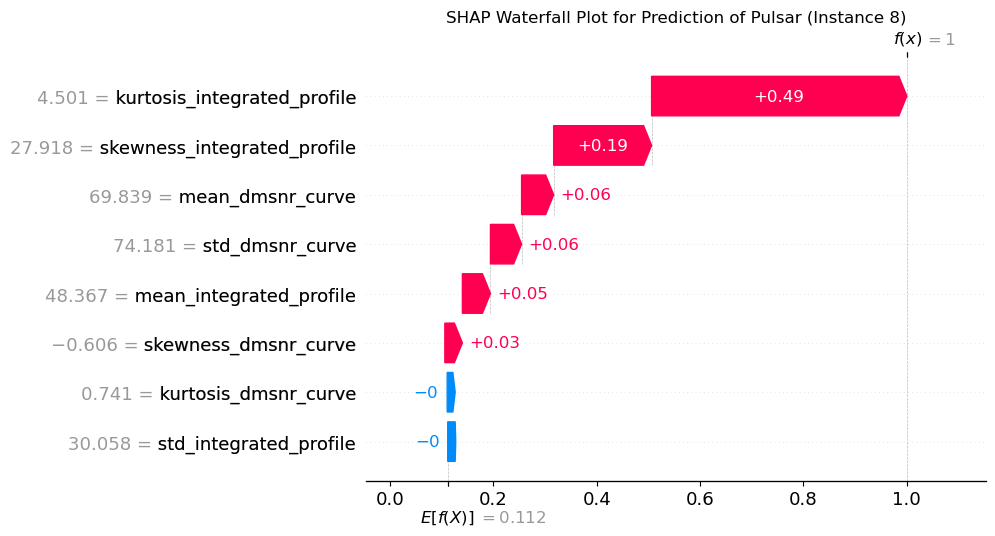

In [49]:
# Waterfall plots are a great alternative to force plots for single instances.
y_pred = model.predict(X_test)
true_positives = np.where((y_test == 1) & (y_pred == 1))[0]

if len(true_positives) > 0:
    idx_to_explain = true_positives[0]
    print(f"\nGenerating Waterfall Plot for a True Pulsar prediction (instance {idx_to_explain})...")

    # Explain the positive class's prediction
    shap.plots.waterfall(shap_explanation[idx_to_explain, :, 1], show=False)
    plt.title(f"SHAP Waterfall Plot for Prediction of Pulsar (Instance {idx_to_explain})")
    plt.show()

In [50]:
print("\n--- SHAP Analysis Complete ---")


--- SHAP Analysis Complete ---
